 STEPS
>>Create a problem statement
>>Identify the data you want to analyze
>>Explore and clean the data
>>Analyze the data to get useful insights
>>Formulating research question and hypothesis 
>>Present the data in forms of reports and visualization -->

# Hotel Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
hotel_data = pd.read_csv(r'C:\Users\nayan\Downloads\mz3NRzB9AXEjMHrhgmkKN4\Data Analysis Projects\hotel_bookings 2.csv')

# EDA and data cleaning

In [3]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
hotel_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
hotel_data.shape

(119390, 32)

In [6]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Convert 'reservation_status_date' column to datetime
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'], errors='coerce')

# Now 'reservation_status_date' column is converted to datetime type


F:\New folder\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/11/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
F:\New folder\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
F:\New folder\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
F:\New folder\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent 

In [9]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [10]:
m=hotel_data.describe(include=object)
m

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
for col in m:
    print(col)
    print(hotel_data[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [12]:
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
hotel_data.drop(['company' ,'agent'],axis=1 ,inplace= True)

In [14]:
hotel_data.dropna(inplace=True)

In [15]:
pd.isnull(hotel_data).sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


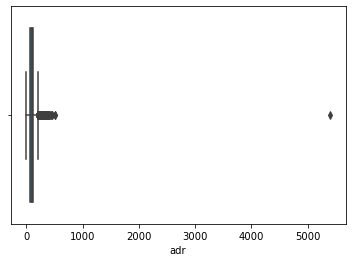

In [17]:
sns.boxplot(x=hotel_data['adr'])
plt.show()

In [18]:
hotel_data = hotel_data[hotel_data['adr']<5000] #dropping the values <5000 in adr column

In [19]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


# Data Analysis and Visualization

In [20]:
is_cancel_count = hotel_data['is_canceled'].value_counts()
is_cancel_count

0    74745
1    44152
Name: is_canceled, dtype: int64

In [21]:
non_canceled_count = len(hotel_data[hotel_data['is_canceled'] == 0])
non_canceled_count

74745

In [22]:
non_canceled_percent = (non_canceled_count/is_cancel_count.sum())*100
non_canceled_percent

62.865337224656635

In [23]:
cancel_count = len(hotel_data[hotel_data['is_canceled'] == 1])
canceled_count_perc = (cancel_count/is_cancel_count.sum())*100
canceled_count_perc

37.134662775343365

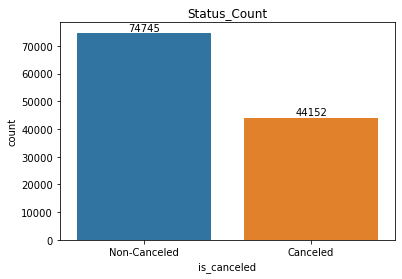

In [24]:

ax = sns.countplot(x = 'is_canceled',data = hotel_data)
ax.set_title('Status_Count')
ax.set_xticklabels(['Non-Canceled', 'Canceled'])

for bars in ax.containers:
    ax.bar_label(bars)

In [25]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07


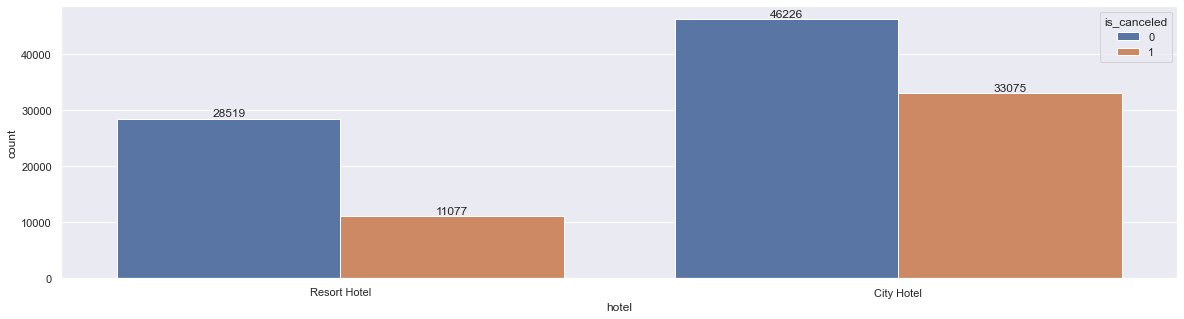

In [161]:
ax = sns.countplot(data = hotel_data, x = 'hotel', hue = 'is_canceled')
sns.set(rc={'figure.figsize':(10,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [27]:
resort_hotel = hotel_data[hotel_data['hotel'] == 'Resort Hotel']
city_hotel =hotel_data[hotel_data['hotel'] == 'City Hotel']

#resort_hotel

In [28]:
canceled_count_resort_hotel = resort_hotel['is_canceled'].value_counts()
canceled_count_resort_hotel

0    28519
1    11077
Name: is_canceled, dtype: int64

In [29]:
canceled_count_city_hotel = city_hotel['is_canceled'].value_counts()
canceled_count_city_hotel


0    46226
1    33075
Name: is_canceled, dtype: int64

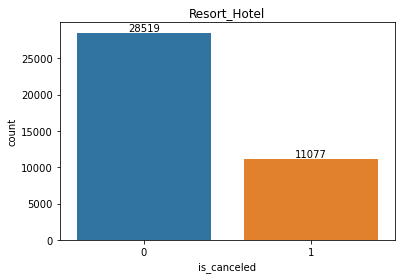

In [30]:

ax = sns.countplot(x = 'is_canceled',data = resort_hotel)
ax.set_title('Resort_Hotel')
# ax.set_xticklabels(['Non-Canceled', 'Canceled'])

for bars in ax.containers:
    ax.bar_label(bars)

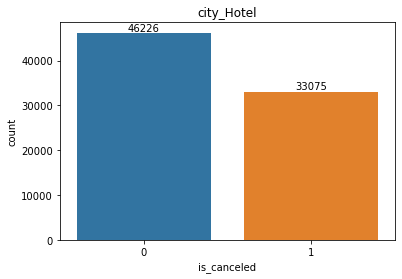

In [31]:

ax = sns.countplot(x = 'is_canceled',data =city_hotel)
ax.set_title('city_Hotel')
# ax.set_xticklabels(['Non-Canceled', 'Canceled'])

for bars in ax.containers:
    ax.bar_label(bars)

In [32]:
non_canceled_count_rs = len(resort_hotel[resort_hotel['is_canceled'] == 0])
is_cancel_count_rs = resort_hotel['is_canceled'].value_counts()
non_canceled_percent = (non_canceled_count/is_cancel_count.sum())*100

In [33]:
is_cancel_count_rs

0    28519
1    11077
Name: is_canceled, dtype: int64

In [34]:
#Resort_hotel_cancel_perc
resort_hotel_can_per = (non_canceled_count_rs/is_cancel_count_rs.sum())*100
resort_hotel_can_per


72.02495201535508

In [35]:
city_hotel =hotel_data[hotel_data['hotel'] == 'City Hotel']


In [36]:
resort_hotel = hotel_data[hotel_data['hotel'] == 'Resort Hotel']

In [37]:
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [38]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07


In [39]:
resort_hotel_adr = resort_hotel.groupby('reservation_status_date')['adr'].mean()
resort_hotel_adr


reservation_status_date
2014-11-18      0.000000
2015-01-01     61.966667
2015-01-05    115.363333
2015-01-06    133.677143
2015-01-07     82.485455
                 ...    
2017-12-05    103.287534
2017-12-06    159.808929
2017-12-07    160.306275
2017-12-08    212.767222
2017-12-09    153.570000
Name: adr, Length: 913, dtype: float64

In [40]:
resort_hotel_adr.index

DatetimeIndex(['2014-11-18', '2015-01-01', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-11', '2015-01-12',
               ...
               '2017-11-08', '2017-12-01', '2017-12-02', '2017-12-03',
               '2017-12-04', '2017-12-05', '2017-12-06', '2017-12-07',
               '2017-12-08', '2017-12-09'],
              dtype='datetime64[ns]', name='reservation_status_date', length=913, freq=None)

In [41]:
resort_hotel_ff = resort_hotel_adr.head()

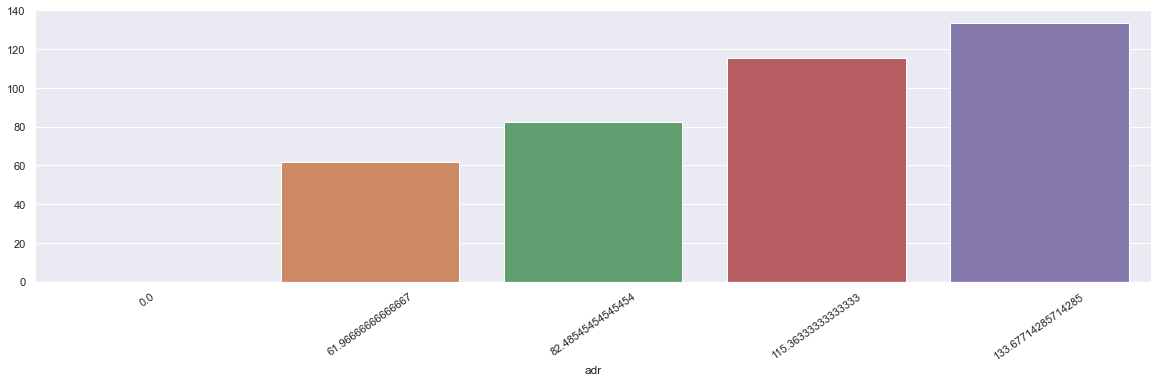

In [42]:
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data = resort_hotel_ff, x = resort_hotel_ff.index,y= resort_hotel_ff.values)
plt.xticks(rotation=35)
plt.show()

In [43]:
# kal subh bina indexwle methid s krna hai

In [44]:
resort_hotel_adr_df = pd.DataFrame(resort_hotel_adr).reset_index()
resort_hotel_adr_df

,reservation_status_date,adr
0,2014-11-18,0.000000
1,2015-01-01,61.966667
2,2015-01-05,115.363333
3,2015-01-06,133.677143
4,2015-01-07,82.485455
...,...,...
908,2017-12-05,103.287534
909,2017-12-06,159.808929
910,2017-12-07,160.306275
911,2017-12-08,212.767222


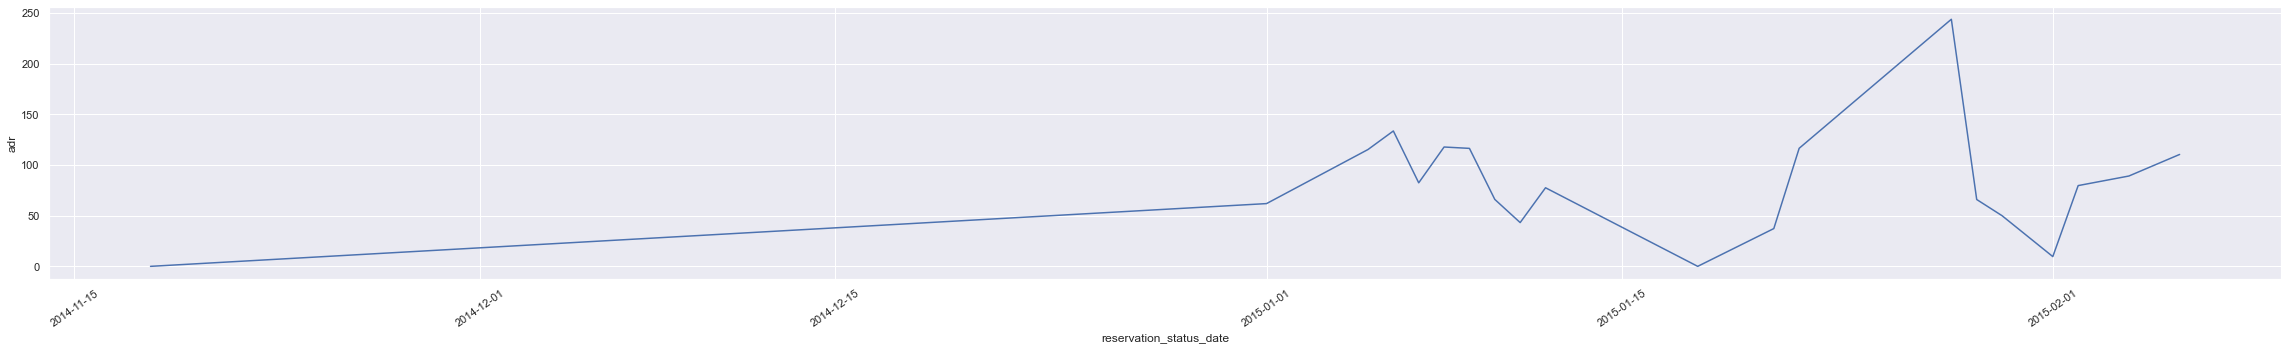

In [45]:
plt.figure(figsize=(40, 5))  # Adjust figure size if needed
sns.lineplot(data=resort_hotel_adr_df.head(20), x='reservation_status_date', y='adr')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=35)

# Show plot
plt.show()


In [46]:
city_hotel_adr = city_hotel.groupby('reservation_status_date')['adr'].mean()

In [47]:
city_hotel_adr

reservation_status_date
2014-10-17     62.800000
2015-01-01     62.063158
2015-01-05     58.900000
2015-01-06     69.216667
2015-01-07     82.877500
                 ...    
2017-12-04    128.755465
2017-12-05    124.544536
2017-12-06    132.725882
2017-12-07    130.473617
2017-12-08    142.949080
Name: adr, Length: 864, dtype: float64

In [48]:
 city_hotel_adr_df= pd.DataFrame( city_hotel_adr).reset_index()
city_hotel_adr_df

,reservation_status_date,adr
0,2014-10-17,62.800000
1,2015-01-01,62.063158
2,2015-01-05,58.900000
3,2015-01-06,69.216667
4,2015-01-07,82.877500
...,...,...
859,2017-12-04,128.755465
860,2017-12-05,124.544536
861,2017-12-06,132.725882
862,2017-12-07,130.473617


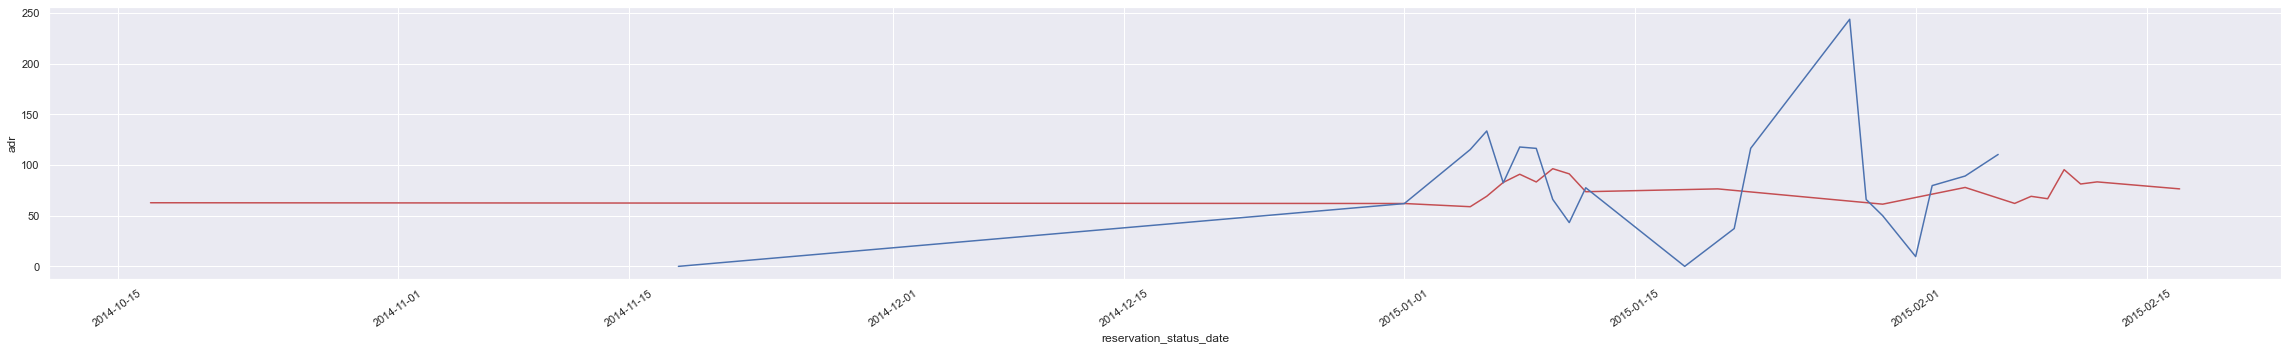

In [162]:
plt.figure(figsize=(40, 5))  # Adjust figure size if needed
sns.lineplot(data=city_hotel_adr_df.head(20), x='reservation_status_date', y='adr',color='r')
sns.lineplot(data=resort_hotel_adr_df.head(20), x='reservation_status_date', y='adr')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=35)

# Show plot
plt.show()

Text(0, 0.5, 'ADR')

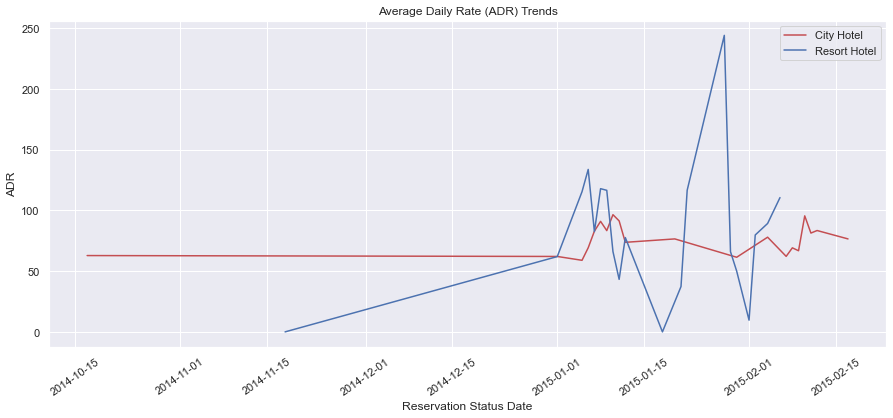

In [50]:
plt.figure(figsize=(15, 6))  # Adjust figure size if needed

# Plot line chart for city hotel
sns.lineplot(data=city_hotel_adr_df.head(20), x='reservation_status_date', y='adr', color='r', label='City Hotel')

# Plot line chart for resort hotel
sns.lineplot(data=resort_hotel_adr_df.head(20), x='reservation_status_date', y='adr', label='Resort Hotel')

# Rotate x-axis labels for better readability
plt.xticks(rotation=35)

# Set plot title
plt.title('Average Daily Rate (ADR) Trends')

# Set x-axis label
plt.xlabel('Reservation Status Date')

# Set y-axis label
plt.ylabel('ADR')

In [51]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07


In [52]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118897 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64

In [60]:
# Get the data type of each column with the same name

hotel_data['month'] = hotel_data['reservation_status_date'].dt.month

In [61]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07,3


In [62]:
city_hotel.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-03-07
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,A,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-01-07
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,A,0,No Deposit,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,A,0,No Deposit,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,A,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-02-04


In [56]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118897 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64

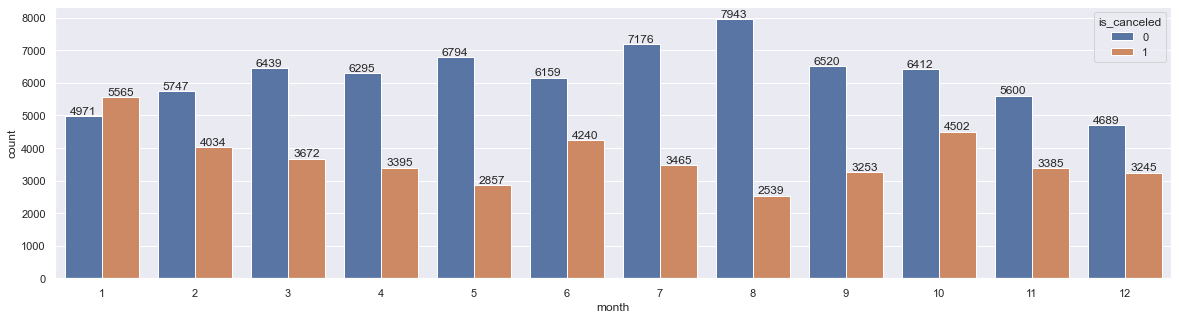

pandas.core.frame.DataFrame

In [96]:

canceled_data = hotel_data.query('is_canceled == 1')

# Group by 'month' and 'is_canceled' columns and calculate the sum of 'adr' for each group
monthly_adr_sum = canceled_data.groupby(['month', 'is_canceled'], as_index=False)['adr'].sum()

In [100]:
canceled_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-06-05,6
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,4
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23,6
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-11-05,11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,1,No Deposit,0,Transient,0.0,0,3,Canceled,2017-04-25,4
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-05-06,5
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-05-31,5
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,0,No Deposit,0,Transient,65.0,0,0,No-Show,2017-07-17,7


<AxesSubplot:xlabel='month', ylabel='adr'>

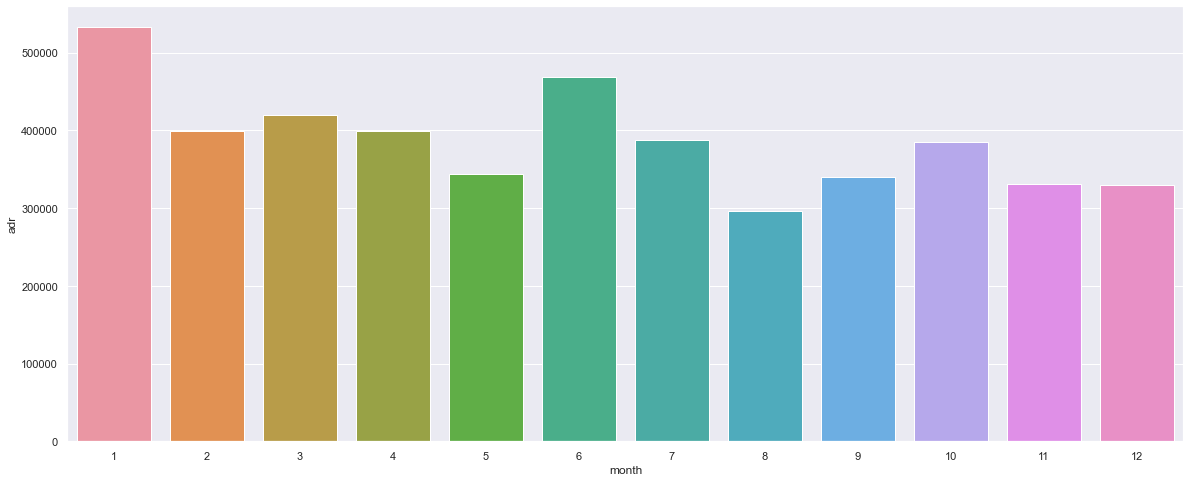

In [104]:
plt.figure(figsize=(20, 8))
sns.barplot(x='month', y='adr', data=monthly_adr_sum)


In [ ]:


canceled_data = hotel_data.query('is_canceled == 1')


In [117]:
top_10_country_cancellation = canceled_data.groupby('country')['adr'].sum().reset_index()
top_10_country_cancellation = top_10_country_cancellation.sort_values(by='adr', ascending=False).head(10)
type(top_10_country_cancellation)


pandas.core.frame.DataFrame

<AxesSubplot:xlabel='country', ylabel='adr'>

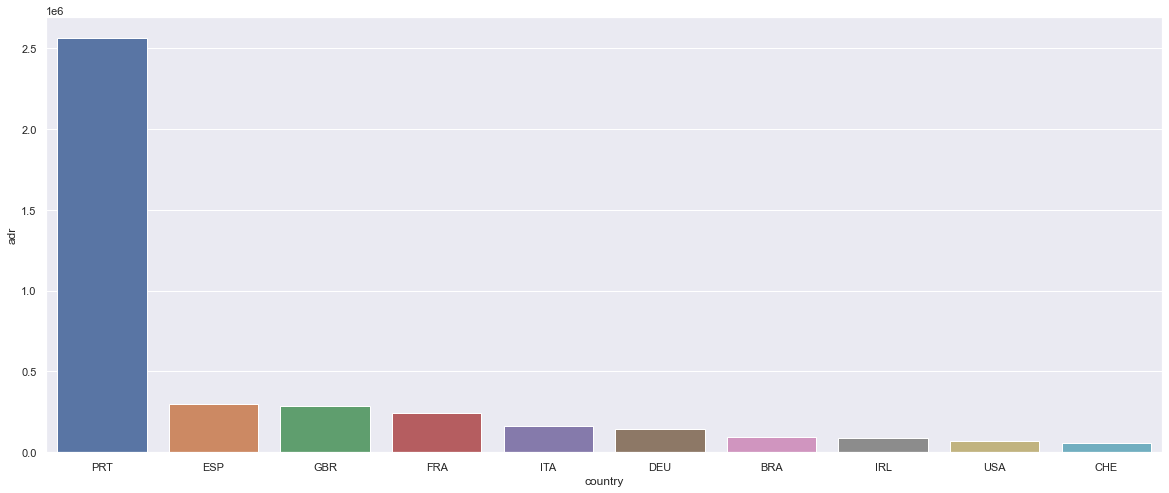

In [128]:
plt.figure(figsize=(20, 8))
sns.barplot(x='country', y='adr', data=top_10_country_cancellation)


In [135]:

hotel_data['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [138]:

hotel_data['market_segment'].value_counts(normalize=True)


Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

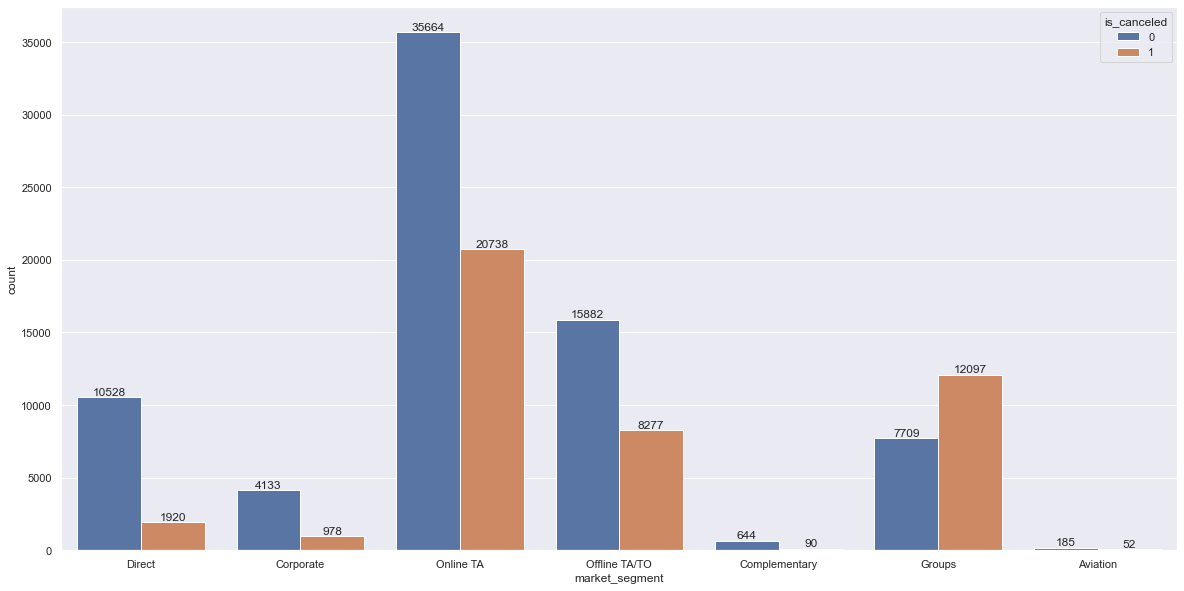

In [144]:
ax = sns.countplot(data = hotel_data, x = 'market_segment', hue = 'is_canceled')

sns.set(rc={'figure.figsize':(20,10)})

for bars in ax.containers:
    ax.bar_label(bars)

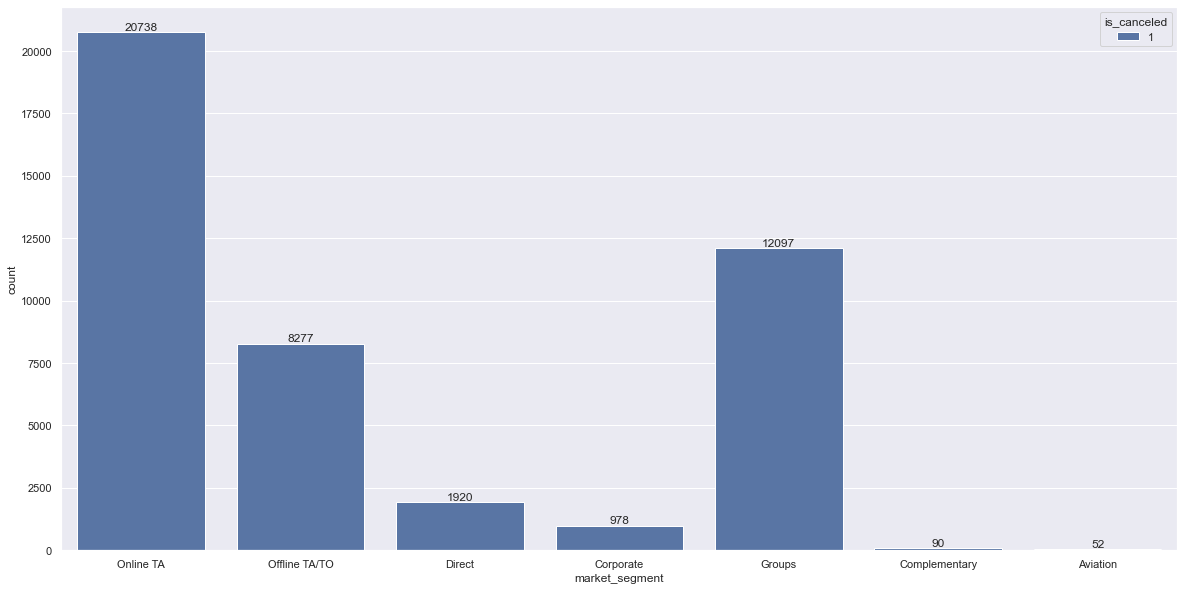

In [145]:
ax = sns.countplot(data = canceled_data, x = 'market_segment', hue = 'is_canceled')

sns.set(rc={'figure.figsize':(20,10)})

for bars in ax.containers:
    ax.bar_label(bars)